# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [16]:
import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
print(len(w))
print(len(b))

2435
2435


## CLT conditions
1. The data is randomly sampled according to the probem description
2. The sample size for each sample is > 30. Therefore the condition for normality is satisfied
3. As the sample size is < 10% of the total labor force, the condition for independence is also met.

## Appropriate test
This calls for a 2-sample test using bootstrap and/or frequentist method

## Null hypothesis
There is no racial discrimination. The fact that the name on a resume is white-sounding or black-sounding has no effect on the candidate's chance of receiving a call from employers

## Alternate hypothesis
There is racial discrimination and the fact that the name on a resume is white-sounding or black-sounding has an effect on the candidate's chance of receiving a call from employers

In [7]:
# Your solution to Q3 here

## Bootstrap method:

In [14]:
def get_permutation_sample(d1, d2):
    d = np.concatenate((d1, d2))
    perm_d = np.random.permutation(d)
    return perm_d[:len(d1)], perm_d[len(d1):]

In [10]:
def get_perm_reps(d1, d2, n_samples, func):
    reps = np.empty(n_samples)
    for i in range(n_samples):
        p1, p2 = get_permutation_sample(d1, d2)
        reps[i] = func(p1, p2)
    return reps

In [25]:
def diff_of_muproportions(d1, d2):
    return np.sum(d1)/len(d1) - np.sum(d2)/len(d2)

In [26]:
perm_reps = get_perm_reps(b.call, w.call, 10000, diff_of_muproportions)

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


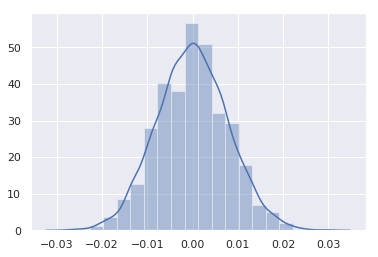

In [27]:
sns.set()
sns.distplot(perm_reps, bins=20)

In [34]:
obs_muprop_w = np.sum(w.call)/len(w)
print(obs_muprop_w)
obs_muprop_b = np.sum(b.call)/len(b)
print(obs_muprop_b)
obs_diff_muprop = obs_muprop_w - obs_muprop_b
print(obs_diff_muprop)

0.09650924024640657
0.06447638603696099
0.032032854209445585


In [36]:
p_val_obs_w = np.sum(perm_reps >= obs_diff_muprop)/len(perm_reps)
print(p_val_obs_w)

0.0


Therefore we can reject the null hypothesis. 

## Frequentist method:

In [33]:
std_obs_w = np.std(w.call)
print(std_obs_w)
std_obs_b = np.std(b.call)
print(std_obs_b)

0.29528486728668213
0.24559901654720306


In [38]:
# std of diff of two distributions
obs_std = np.sqrt((std_obs_w**2 + std_obs_b**2)/len(w))
print(obs_std)

0.007783308359923415


In [39]:
# assuming null hyporthesis is true, the difference of mean proportions of the population is 0
z = (obs_diff_muprop - 0)/obs_std
print(z)

4.115583339134308


In [41]:
p_val = 1 - stats.norm.cdf(x=z)
print(p_val)

1.9310070954903225e-05


Therefore we can reject the null hypothesis. 

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Based on the results of above tests, there is significant evidence that there is racial discrimination and the fact that the name on a resume is white-sounding or black-sounding has an effect on the candidate's chance of receiving a call from employers

We cannot however say that race is the most important factor in callback success. We dont have any evidence for making this statement, only to reject the null hypothesis